In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from scipy.io import loadmat
from IPython.display import display

import os

# Load Training and Test Data

In [6]:
# Load pre-constructed train/test arrays from Stanford Dataset
train_list = loadmat('./lists/train_list.mat')
test_list = loadmat('./lists/test_list.mat')

In [8]:
# Split training data into a directory list, label list, and annotation list
file_list_train = [i.item() for i in train_list["file_list"].flatten()]
label_list_train = [i.item() for i in train_list["labels"].flatten()]
annotation_list_train = [i.item() for i in train_list['annotation_list'].flatten()]

# Split testing data into a directory list, label list, and annotation list
file_list_test = [i.item() for i in test_list["file_list"].flatten()]
label_list_test = [i.item() for i in test_list["labels"].flatten()]
annotation_list_test = [i.item() for i in test_list['annotation_list'].flatten()]

In [26]:
# Examine contents of lists
print(file_list_train[0], "|", label_list_train[0], "|", annotation_list_train[0])

n02085620-Chihuahua/n02085620_5927.jpg | 1 | n02085620-Chihuahua/n02085620_5927


In [85]:
import re

# Build a function to extract the breed name from the file list
def extract_breed(file_string):
    return re.search(r'\-(.*?)\/',file_string).group(1)

# Function to extract the breed name and clean string
def clean_breed(file_string):    
    breed = re.search(r'\-(.*?)\/',file_string).group(1)
    breed = breed.replace("_", " ")
    breed = breed.title()
    
    return(breed)

In [86]:
# Build DataFrames containing directory structure, name of breed, and label
breed_list_train = [clean_breed(i) for i in file_list_train]
breed_list_test = [clean_breed(i) for i in file_list_test]

train_df = pd.DataFrame(
    list(zip(file_list_train, annotation_list_train, breed_list_train, label_list_train)),
    columns=['File', 'Annotation', 'Breed', 'Label'])

test_df = pd.DataFrame(
    list(zip(file_list_test, annotation_list_test, breed_list_test, label_list_test)),
    columns=['File', 'Annotation', 'Breed', 'Label'])


#df_y_train = pd.get_dummies(pd.get_dummies(train.Label))

In [87]:
train_df.head()

File  \
0   n02085620-Chihuahua/n02085620_5927.jpg   
1   n02085620-Chihuahua/n02085620_4441.jpg   
2   n02085620-Chihuahua/n02085620_1502.jpg   
3   n02085620-Chihuahua/n02085620_1916.jpg   
4  n02085620-Chihuahua/n02085620_13151.jpg   

                            Annotation      Breed  Label  
0   n02085620-Chihuahua/n02085620_5927  Chihuahua      1  
1   n02085620-Chihuahua/n02085620_4441  Chihuahua      1  
2   n02085620-Chihuahua/n02085620_1502  Chihuahua      1  
3   n02085620-Chihuahua/n02085620_1916  Chihuahua      1  
4  n02085620-Chihuahua/n02085620_13151  Chihuahua      1

In [88]:
test_df.head()

File                          Annotation  \
0  n02085620-Chihuahua/n02085620_2650.jpg  n02085620-Chihuahua/n02085620_2650   
1  n02085620-Chihuahua/n02085620_4919.jpg  n02085620-Chihuahua/n02085620_4919   
2  n02085620-Chihuahua/n02085620_1765.jpg  n02085620-Chihuahua/n02085620_1765   
3  n02085620-Chihuahua/n02085620_3006.jpg  n02085620-Chihuahua/n02085620_3006   
4  n02085620-Chihuahua/n02085620_1492.jpg  n02085620-Chihuahua/n02085620_1492   

       Breed  Label  
0  Chihuahua      1  
1  Chihuahua      1  
2  Chihuahua      1  
3  Chihuahua      1  
4  Chihuahua      1

In [270]:
#How many of each dog breed are in the dataset?
display(f"There are {train_df['Breed'].nunique()} different dog breeds in the dataset")

'There are 120 different dog breeds in the dataset'

In [272]:
#How large is the training dataset?
display(f"The training data contains {train_df.shape[0]} observations")

'The training data contains 12000 observations'

In [273]:
#How large are the test datasets?
display(f"The testing data contains {test_df.shape[0]} observations")

'The testing data contains 8580 observations'

# Examine Image Dimensions

In [ ]:
%%time

# Create a blank list to store the dimensions of each image in training dataset
# Takes a considerable amount of time

image_dimensions = []
for index, value in train_df.iterrows():
    img = imread("Images/" + train_df.iloc[index].File)
    image_dimensions.append(img.shape)

In [291]:
%%time

# Create a blank list to store the dimensions of each image in training dataset
# Takes a considerable amount of time

image_dimensions_test = []
for index, value in test_df.iterrows():
    image_dimensions.append(np.asarray([imread("Images/" + test_df.iloc[index].File)]).shape)

1 loop, best of 3: 1min 7s per loop


In [296]:
#train_df['Dimensions'] = image_dimensions
#test_df['Dimensions'] = image_dimensions_test
len(image_dimensions) / 4

11580.0

In [ ]:
train_df.head()

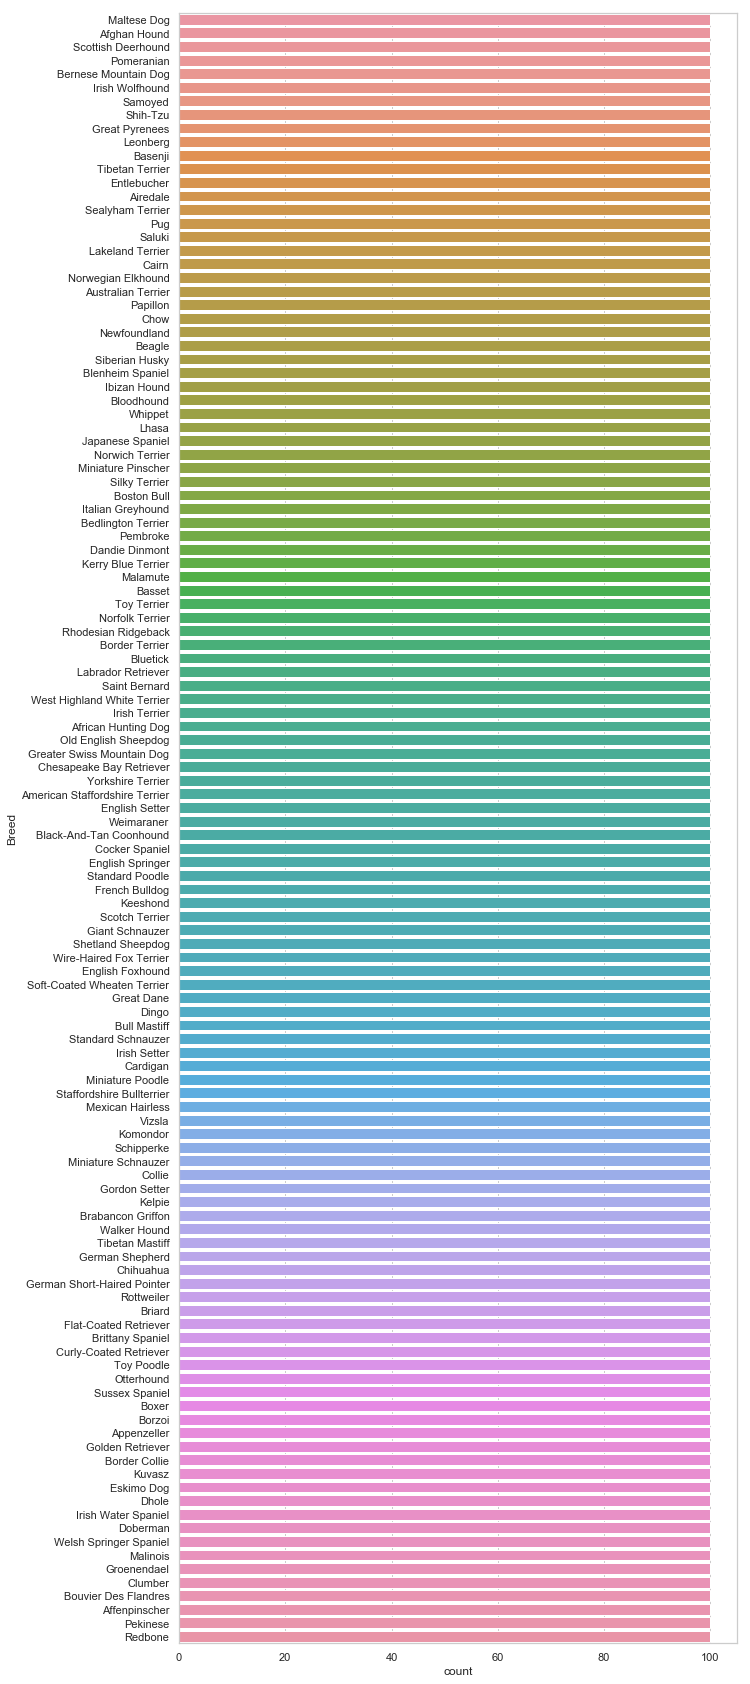

In [94]:
#Plot the breakdown of breeds in the training set
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 30))
ax = sns.countplot(y="Breed", data=train_df,
                   order = test_df['Breed'].value_counts().index)

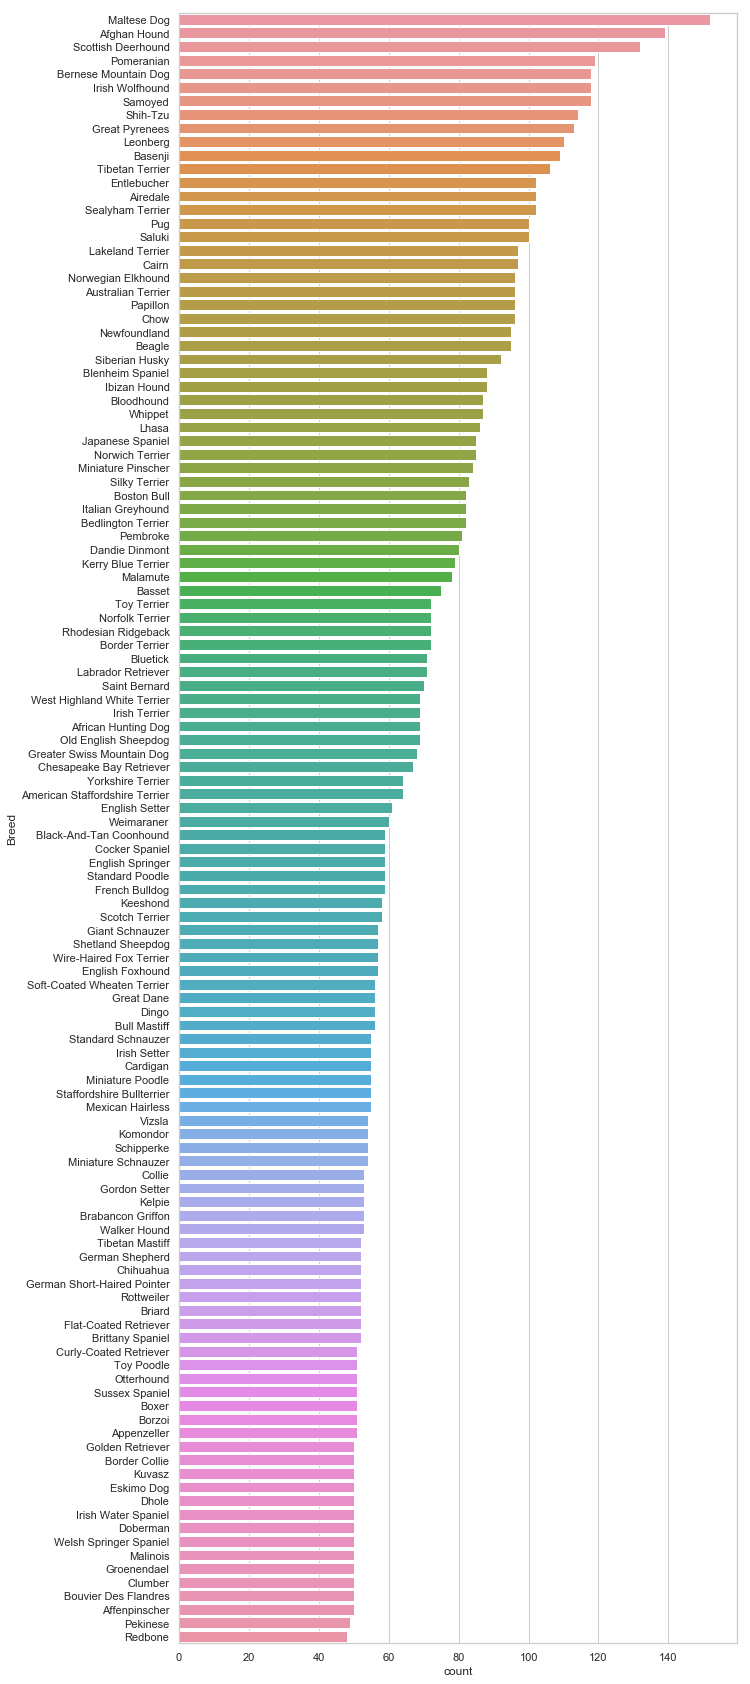

In [91]:
#Plot the breakdown of breeds in the test set
fig, ax = plt.subplots(figsize=(10, 30))
ax = sns.countplot(y="Breed", data=test_df, 
                   order = test_df['Breed'].value_counts().index)

In [217]:
#Generates a bounding box of the image of the dog from the Annotations list
def generate_bounding_box(file_string):
    file = open(file_string, 'r', encoding="utf-8")
    file_content=file.readlines() 

    x_min = float(re.search(r'<xmin>(.+?)</xmin>', file_content[18]).group(1))
    y_min = float(re.search(r'<ymin>(.+?)</ymin>', file_content[19]).group(1))
    x_max = float(re.search(r'<xmax>(.+?)</xmax>', file_content[20]).group(1))
    y_max = float(re.search(r'<ymax>(.+?)</ymax>', file_content[21]).group(1))  
    
    box_height = y_max - y_min  
    box_width = x_max - x_min
          
    #bounding_box = f"{x_min}, {y_min}, {box_width}, {box_height}"
    bounding_box = [x_min, y_min, box_width, box_height]

    return(bounding_box)     

# Visualize First 20 Dog Breeds in Training Set

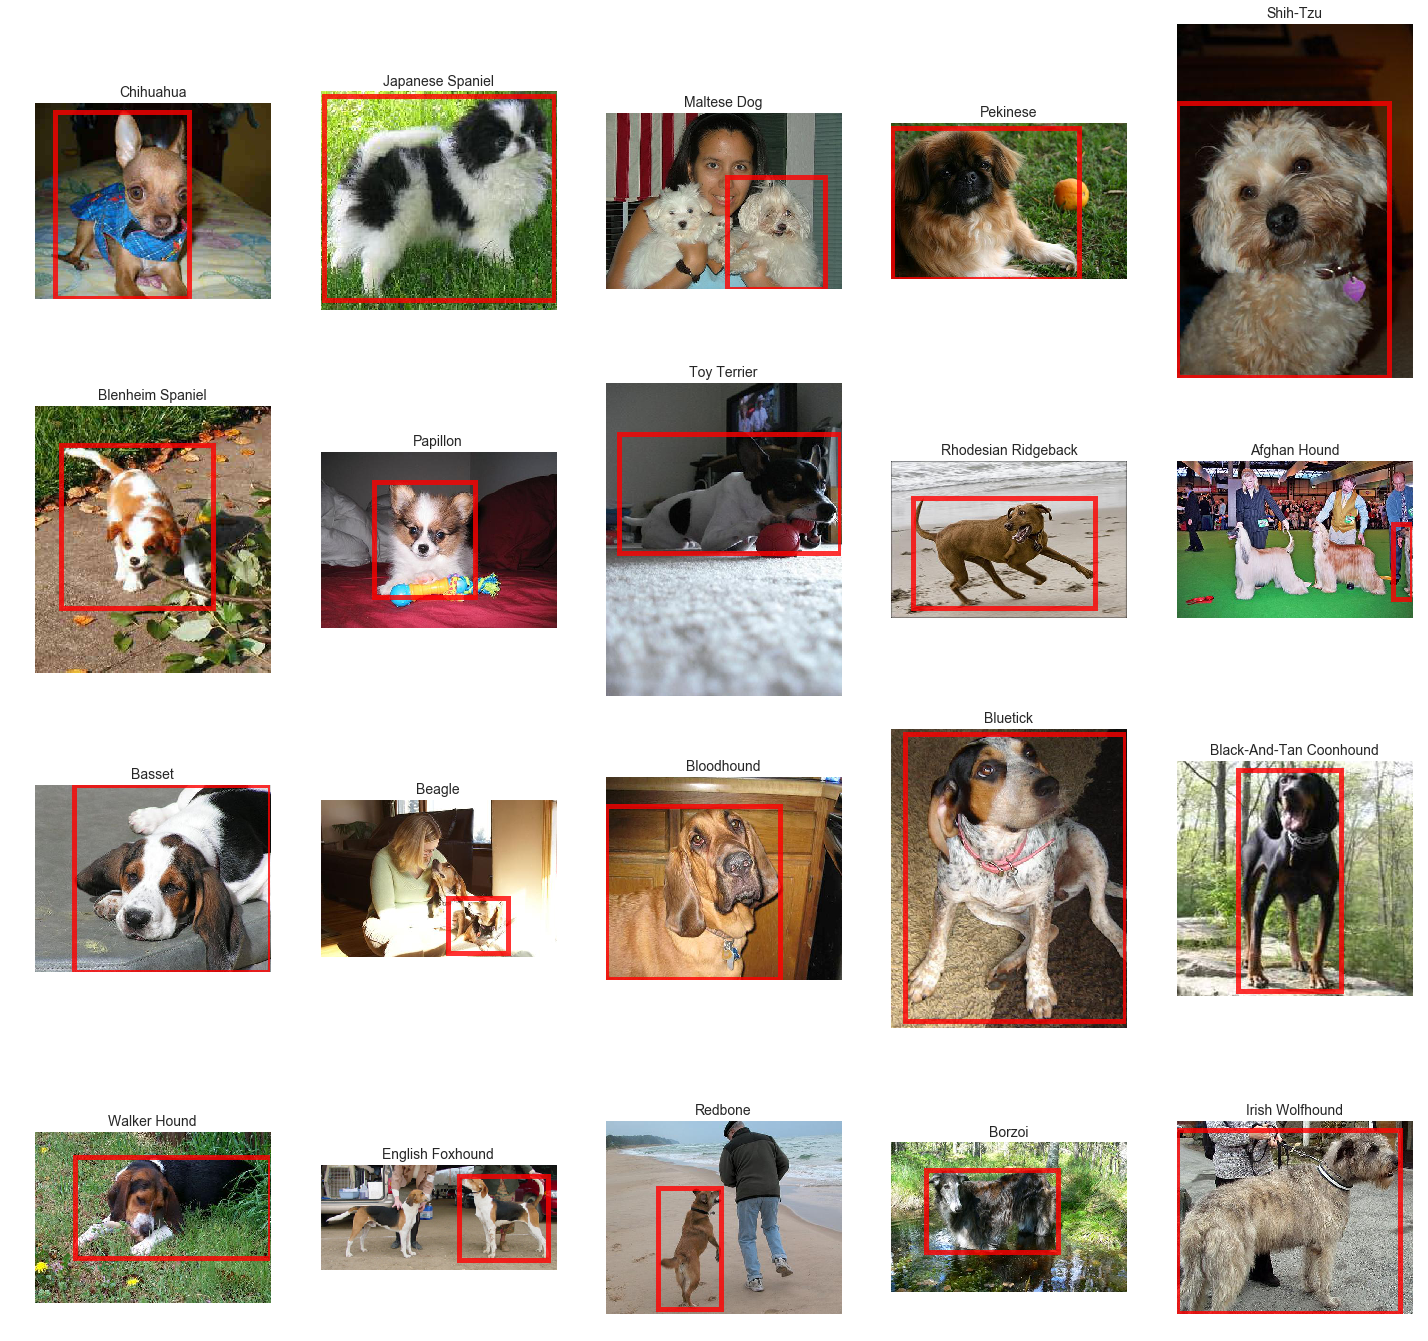

In [173]:
import matplotlib.patches as patches

# Generates a randomly shuffled dataframe
# with one copy of each breed for plotting purposes
train_df_plot = train_df.sample(frac=1, random_state = 42)
train_df_plot = train_df.drop_duplicates(subset="Breed")

# Creates a 4x5 plotting environment
fig, axes = plt.subplots(4,5, figsize=(20,20))
ax = axes.flatten()
counter = 0

# Have to reduce images to the first 20 due to IOPub Rate Limiting
for index, breed in train_df_plot[0:20].iterrows():
    image_data = imread("Images/" + breed['File'])
    ax[counter].imshow(image_data)
    
    # Generates a bounding box around the dog
    x, y, w, h = generate_bounding_box("Annotation/" + train_df['Annotation'][index])
    rect = patches.Rectangle((x,y), w ,h ,
                             linewidth=5,
                             edgecolor='Red',
                             facecolor='None',
                             fill = False,
                             alpha = .8)

    # Add the patch to the Axes
    ax[counter].add_patch(rect)

    # Set Title
    ax[counter].set_title(breed['Breed'], fontsize=14)
    ax[counter].set_axis_off()
    counter += 1

# Visualize First 20 Dog Breeds in Test Set

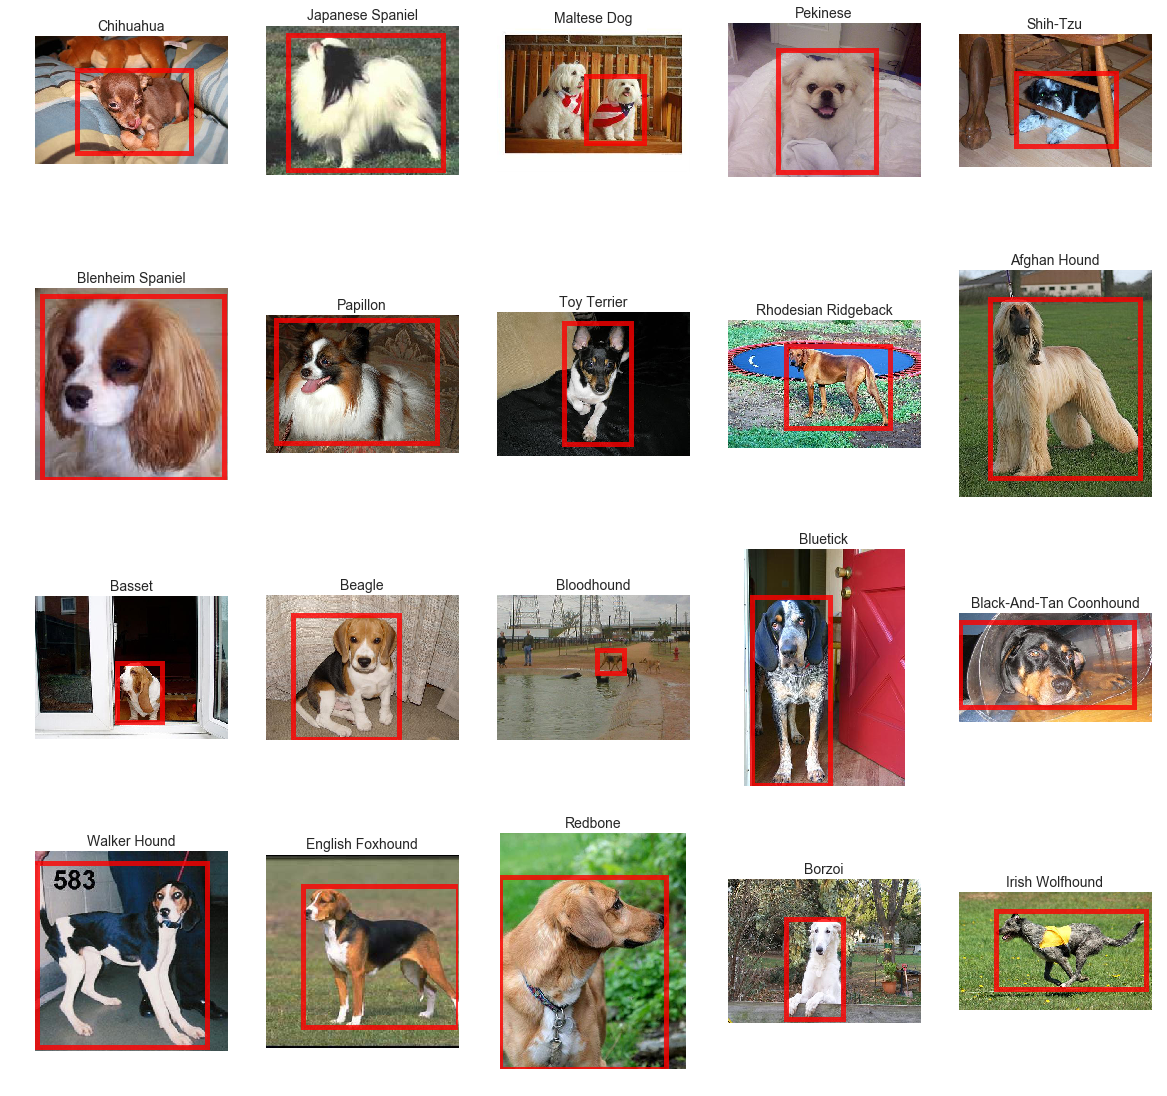

In [175]:
# Generates a randomly shuffled dataframe
# with one copy of each breed for plotting purposes
test_df_plot = test_df.sample(frac=1, random_state = 42)
test_df_plot = test_df.drop_duplicates(subset="Breed")

# Creates a 4x5 plotting environment
fig, axes = plt.subplots(4,5, figsize=(20,20))
ax = axes.flatten()
counter = 0

# Have to reduce images to the first 20 due to IOPub Rate Limiting
for index, breed in test_df_plot[0:20].iterrows():
    image_data = imread("Images/" + breed['File'])
    ax[counter].imshow(image_data)
    
    # Generates a bounding box around the dog
    x, y, w, h = generate_bounding_box("Annotation/" + test_df['Annotation'][index])
    rect = patches.Rectangle((x,y), w ,h ,
                             linewidth=5,
                             edgecolor='Red',
                             facecolor='None',
                             fill = False,
                             alpha = .8)

    # Add the patch to the Axes
    ax[counter].add_patch(rect)

    # Set Title
    ax[counter].set_title(breed['Breed'], fontsize=14)
    ax[counter].set_axis_off()
    counter += 1

# Generate Sample Images with Filters

In [267]:
# Inspiration from this Repo
# #https://github.com/kcirtap2014/stanford_dog_breed


from skimage import filters
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage.exposure import rescale_intensity
from skimage import filters
from skimage.io import imread
from skimage.color import rgb2grey

import random

# Define a helper functions
# http://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_adapt_rgb.html
@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)

# Random image indices we want to visualize
image_indices = random.sample(range(1, train_df.shape[0]), 5)

# Generate empty list of lists to store transformed images
images = [[] for i in range(len(image_indices))]
grey_scale_transform = [[] for i in range(len(image_indices))]
sobel_transform = [[] for i in range(len(image_indices))]
exposure_equalize_transform = [[] for i in range(len(image_indices))]


# Iterate over all images and apply an illustrative transform
for i, key in enumerate(image_indices):
    images[i] = imread("images/" + train_df.loc[key].File);
    
    # Process into grey scale for illustrative purposes
    grey_scale_transform[i] = rgb2grey(images[i])
    
    # Sobel's edge detection algorithm 
    sobel_transform[i] = rescale_intensity(1 - sobel_each(images[i]))
    
    # Equalization
    exposure_equalize_transform[i] = exposure.equalize_hist(image[i])

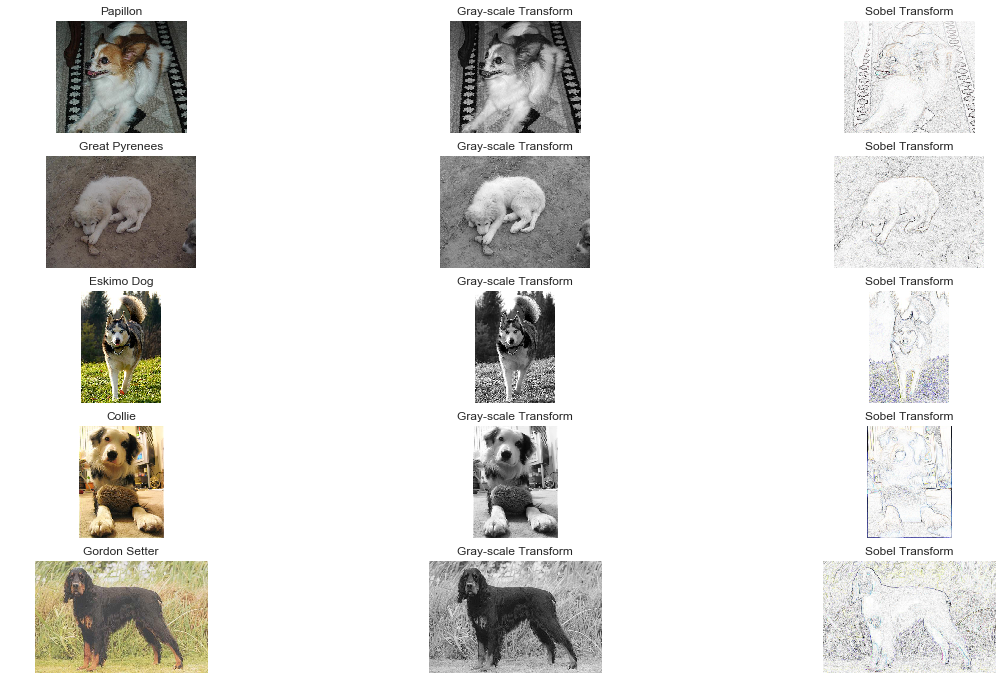

In [269]:
fig, axes = plt.subplots(5, 3, figsize=(20, 12))
counter = 0

for i, ax in enumerate(axes.flatten()):
    ax.axis('off')

    if i % 3 == 0:
        ax.imshow(images[counter])
        ax.set_title(train_df.loc[image_indices[counter]].Breed)
    elif i % 3 == 1:
        ax.imshow(grey_scale_transform[counter], cmap=plt.cm.gray)
        ax.set_title("Gray-scale Transform")
    elif i % 3 == 2:
        ax.imshow(sobel_transform[counter])
        ax.set_title('Sobel Transform')
        counter += 1


# Experiment with Image Augmentation



In [ ]:
# Idea and some code from: https://github.com/stormy-ua/dog-breeds-classification

